# 1. Linear Convolution and Circular Convolution on Discrete Time Signals

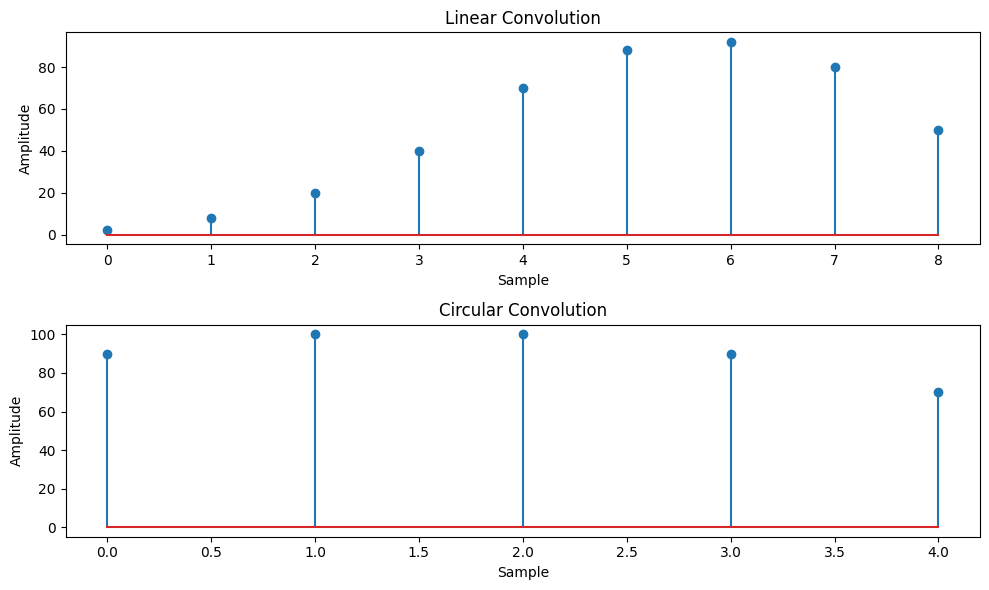

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function for linear convolution
def linear_convolution(signal1, signal2):
    # Compute the linear convolution
    linear_conv = np.convolve(signal1, signal2, mode='full')
    return linear_conv

# Function for circular convolution
def circular_convolution(signal1, signal2):
    # Compute the circular convolution
    if(len(signal1) > len(signal2)):
        fft_length = len(signal1)
    else:
        fft_length = len(signal2)
    
    fft_signal1 = np.fft.fft(signal1, fft_length)
    fft_signal2 = np.fft.fft(signal2, fft_length)
    circular_conv = np.fft.ifft(fft_signal1 * fft_signal2)
    return circular_conv


# Define the discrete-time signals
signal1 = np.array([1, 2, 3, 4, 5])
signal2 = np.array([2, 4, 6, 8, 10])

# Compute the linear convolution
linear_conv = linear_convolution(signal1, signal2)

# Compute the circular convolution
circular_conv = circular_convolution(signal1, signal2)

# Plot the linear and circular convolution results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(linear_conv)
plt.title('Linear Convolution')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.stem(circular_conv)
plt.title('Circular Convolution')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


# 2. Audio convolution

Convoluted audio saved as 'sheep-bleating_convoluted.wav'.


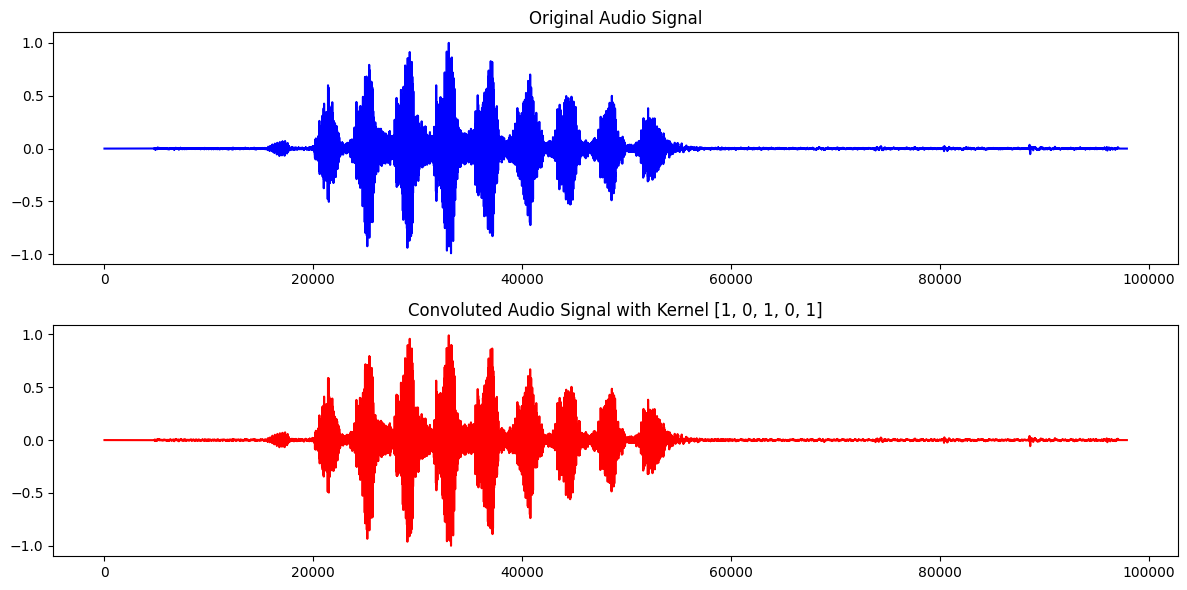

In [10]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Load MP3 file
audio = AudioSegment.from_mp3("audio/sheep-bleating.mp3")

# Convert to mono and extract raw samples
audio = audio.set_channels(1)
samples = np.array(audio.get_array_of_samples()).astype(np.float32)

# Define convolution kernel
kernel = np.array([1, 0, 1, 0, 1], dtype=np.float32)

# Perform convolution
convoluted = convolve(samples, kernel, mode='same')

# Normalize to int16 range for saving
convoluted = convoluted / np.max(np.abs(convoluted)) # Normalize to [-1, 1]
convoluted_int16 = (convoluted * 32767).astype(np.int16) # Scale to int16

# Save as WAV using PyDub
convoluted_audio = AudioSegment(
    convoluted_int16.tobytes(),
    frame_rate=audio.frame_rate,
    sample_width=2, # 16-bit samples = 2 bytes
    channels=1
)

# Export to file
convoluted_audio.export("output_audio/sheep-bleating_convoluted.wav", format="wav")
print("Convoluted audio saved as 'sheep-bleating_convoluted.wav'.")

# Plot original and convoluted signals (optional)
samples_norm = samples / np.max(np.abs(samples))
convoluted_norm = convoluted

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(samples_norm, color='blue')
plt.title("Original Audio Signal")

plt.subplot(2, 1, 2)
plt.plot(convoluted_norm, color='red')
plt.title("Convoluted Audio Signal with Kernel [1, 0, 1, 0, 1]")

plt.tight_layout()
plt.show()